🔹 로지스틱 회귀 결과
[[1 2]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4

🔹 랜덤 포레스트 결과
[[1 2]
 [0 1]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.33      1.00      0.50         1

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



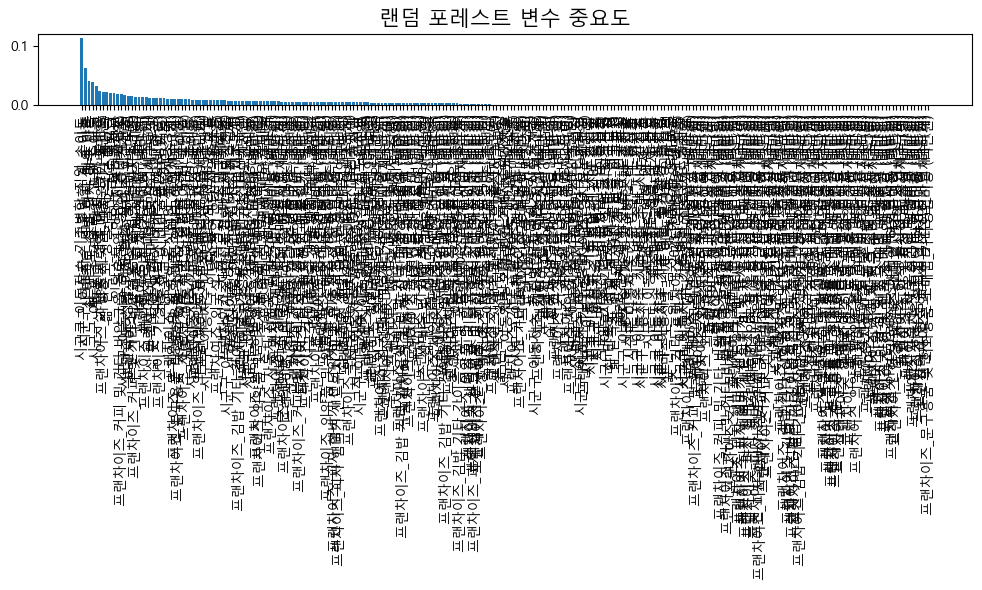

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 데이터 불러오기
file_path = "지역별_인구보정_만족도.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# 쉼표 제거 및 숫자형 변환 (모든 열에 대해 적용)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(",", "").str.strip()
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass  # 변환 불가능한 경우는 그대로 둠

# 타겟 컬럼 지정
target_col = "삶 만족도_전체_계_매우 만족"
if target_col not in df.columns:
    raise ValueError(f"{target_col} 컬럼이 존재하지 않습니다.")

# 결측치 제거
df = df.dropna(subset=[target_col])

# 특징(X), 타겟(y) 설정
X = df.drop(columns=["지역", target_col])
y_raw = df[target_col]
threshold = y_raw.median()
y = (y_raw >= threshold).astype(int)

# 결측치 제거
X = X.dropna(axis=1)

# 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 학습/검증 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 로지스틱 회귀
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# 랜덤 포레스트
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# 결과 출력
print("🔹 로지스틱 회귀 결과")
print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

print("🔹 랜덤 포레스트 결과")
print(confusion_matrix(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

# 변수 중요도 시각화
importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("랜덤 포레스트 변수 중요도", fontsize=15)
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()
